# How are in-demand skills trending for Data Analysts?

## Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [71]:
# Importing libraries
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt 

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

1. Aggregate skill counts monthly


In [72]:
df_DA_MY = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Malaysia')].copy()

df_DA_MY['job_posted_month_no'] = df_DA_MY['job_posted_date'].dt.month

df_DA_MY_explode = df_DA_MY.explode('job_skills')

In [73]:
df_DA_MY_pivot = df_DA_MY_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_MY_pivot.loc['Total'] = df_DA_MY_pivot.sum()

df_DA_MY_pivot = df_DA_MY_pivot[df_DA_MY_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_MY_pivot = df_DA_MY_pivot.drop('Total')

df_DA_MY_pivot

job_skills,sql,excel,python,tableau,power bi,sas,r,sap,powerpoint,word,...,cassandra,asana,no-sql,rshiny,powerbi,powershell,rust,slack,vb.net,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,87,99,50,48,46,54,22,23,20,16,...,0,0,0,0,0,0,0,0,0,0
2,66,66,45,41,37,38,26,23,21,11,...,0,0,0,0,0,0,0,0,0,0
3,106,100,60,57,50,40,30,27,21,16,...,0,1,0,0,0,0,0,1,0,0
4,79,76,49,34,43,30,32,27,11,7,...,0,0,0,0,0,0,0,0,0,0
5,110,99,83,49,43,40,32,22,21,23,...,0,0,0,0,0,1,0,0,0,0
6,117,99,85,52,44,26,37,26,12,11,...,0,0,1,0,0,0,1,0,0,0
7,93,66,70,35,43,22,27,19,16,12,...,0,0,0,0,0,0,0,0,0,0
8,106,98,71,62,48,30,37,23,16,17,...,0,0,0,0,0,0,0,0,0,0
9,63,54,40,43,32,16,17,11,6,6,...,0,0,0,0,0,0,0,0,0,0


2. Re-analyze based on the percentage of the total jobs

In [74]:
DA_totals = df_DA_MY.groupby('job_posted_month_no').size()

In [75]:
df_DA_MY_percent = df_DA_MY_pivot.div(DA_totals/100, axis=0)

df_DA_MY_percent

job_skills,sql,excel,python,tableau,power bi,sas,r,sap,powerpoint,word,...,cassandra,asana,no-sql,rshiny,powerbi,powershell,rust,slack,vb.net,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,36.554622,41.596639,21.008403,20.168067,19.327731,22.689076,9.243697,9.663866,8.403361,6.722689,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
2,36.871508,36.871508,25.139665,22.905028,20.670391,21.229050,14.525140,12.849162,11.731844,6.145251,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
3,50.000000,47.169811,28.301887,26.886792,23.584906,18.867925,14.150943,12.735849,9.905660,7.547170,...,0.00000,0.471698,0.000000,0.00000,0.00000,0.000000,0.000000,0.471698,0.000000,0.00000
4,40.101523,38.578680,24.873096,17.258883,21.827411,15.228426,16.243655,13.705584,5.583756,3.553299,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
5,46.413502,41.772152,35.021097,20.675105,18.143460,16.877637,13.502110,9.282700,8.860759,9.704641,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.421941,0.000000,0.000000,0.000000,0.00000
6,51.091703,43.231441,37.117904,22.707424,19.213974,11.353712,16.157205,11.353712,5.240175,4.803493,...,0.00000,0.000000,0.436681,0.00000,0.00000,0.000000,0.436681,0.000000,0.000000,0.00000
7,48.947368,34.736842,36.842105,18.421053,22.631579,11.578947,14.210526,10.000000,8.421053,6.315789,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
8,50.476190,46.666667,33.809524,29.523810,22.857143,14.285714,17.619048,10.952381,7.619048,8.095238,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
9,41.447368,35.526316,26.315789,28.289474,21.052632,10.526316,11.184211,7.236842,3.947368,3.947368,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000


In [76]:
df_DA_MY_percent = df_DA_MY_percent.reset_index()
df_DA_MY_percent['job_posted_month'] = df_DA_MY_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_MY_percent = df_DA_MY_percent.set_index('job_posted_month')
df_DA_MY_percent = df_DA_MY_percent.drop(columns='job_posted_month_no')


df_DA_MY_percent

job_skills,sql,excel,python,tableau,power bi,sas,r,sap,powerpoint,word,...,cassandra,asana,no-sql,rshiny,powerbi,powershell,rust,slack,vb.net,wire
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,36.554622,41.596639,21.008403,20.168067,19.327731,22.689076,9.243697,9.663866,8.403361,6.722689,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Feb,36.871508,36.871508,25.139665,22.905028,20.670391,21.229050,14.525140,12.849162,11.731844,6.145251,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Mar,50.000000,47.169811,28.301887,26.886792,23.584906,18.867925,14.150943,12.735849,9.905660,7.547170,...,0.00000,0.471698,0.000000,0.00000,0.00000,0.000000,0.000000,0.471698,0.000000,0.00000
Apr,40.101523,38.578680,24.873096,17.258883,21.827411,15.228426,16.243655,13.705584,5.583756,3.553299,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
May,46.413502,41.772152,35.021097,20.675105,18.143460,16.877637,13.502110,9.282700,8.860759,9.704641,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.421941,0.000000,0.000000,0.000000,0.00000
Jun,51.091703,43.231441,37.117904,22.707424,19.213974,11.353712,16.157205,11.353712,5.240175,4.803493,...,0.00000,0.000000,0.436681,0.00000,0.00000,0.000000,0.436681,0.000000,0.000000,0.00000
Jul,48.947368,34.736842,36.842105,18.421053,22.631579,11.578947,14.210526,10.000000,8.421053,6.315789,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Aug,50.476190,46.666667,33.809524,29.523810,22.857143,14.285714,17.619048,10.952381,7.619048,8.095238,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
Sep,41.447368,35.526316,26.315789,28.289474,21.052632,10.526316,11.184211,7.236842,3.947368,3.947368,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000


3. Plot the monthly skill demand

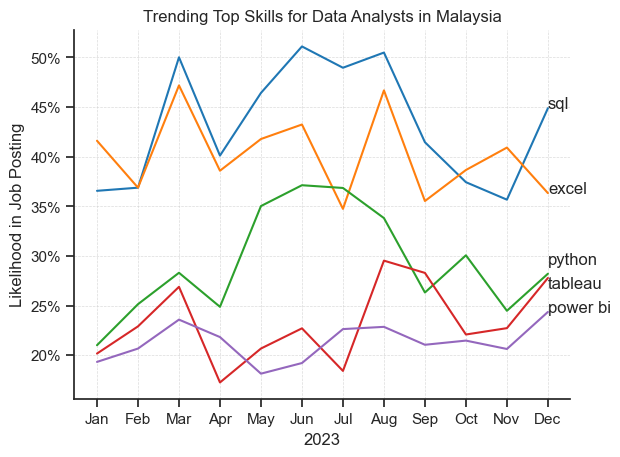

In [105]:
df_plot = df_DA_MY_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style="ticks")
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Malaysia')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)


from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    if i == 2:  # Adjust the 3rd word
        plt.text(11, df_plot.iloc[-1, i] + 1, df_plot.columns[i]) 
    elif i == 3:  # Adjust the 4th word
        plt.text(11, df_plot.iloc[-1, i] - 1, df_plot.columns[i])
    else:
        plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i])
